# Physics and Astrophysics

## Orbital Dynamics
Dynamical studies of planetary bodies characterize their orbital motion, rotation (including changes in obliquity), and deformation resulting from tidal distortions.  Dynamics is the oldest discipline in the planetary sciences.  

- Gravitational interactions determine how the a planet's distance from the Sun varies over time and thus how much solar radiation the planet receives.
- Rotation rates determine the length of the day.
- Obliquity influences the temperature differences between the pole and equator, as well as seasonal variations.
- Tidal heating (from tidal distortions) produces extensive volcanism on bodies such as Jupiter's moon Io.
  
The study of planetary motions dates back to antiquity through observational studies and kinematic modeling.  Modern planetary dynamics begins (in earnest) during the 17th century with Johannes Kepler and [Tycho Brahe](https://en.wikipedia.org/wiki/Tycho_Brahe).  Brahe had taken the finest planetary observations in all of Europe, and after his death, Kepler used his results in an extensive mathematical analysis.  Later, Isaac Newton provided a firm basis for dynamical studies using universal physical laws (i.e., applicable on Earth and in the heavens).  

in 1687, Newton showed that the relative motion of two spherically symmetric bodies resulting from their mutual gravitational attraction is described by simple conic sections:

- ellipses for bound orbits and parabolas;
- hyperbolas for unbound trajectories.

Albert Einstein's theories of relativity (Special and General) fundamentally modified the underlying theories of motion and gravity, but the relativistic corrections to planetary motions is generally quite small.

```{note}
All bodies in the Universe are subject ot the gravitational attraction of *all* other bodies.  However, the trajectory of one body is well approximated by considering just the gravitational force exerted on it by a *single* other body.
```

### Kepler's Laws of Planetary Motion
By careful analysis of the observed orbits of planets, Kepler deduced his three laws of planetary motion:


1. *All planets move along elliptical paths with the Sun at one focus.*  The shape of an ellipse is characterized by two parameters: the **semimajor axis** $a$ (i.e., the average of the minimum and maximum heliocentric distances), and the **eccentricity** (i.e., the fraction by which the focus is displaced from the center).  Locating a point on an ellipse is accomplished through the **true anomaly** $f$ that is the angle between the planet's **perihelion** (closest approach to the Sun) and its instantaneous position.
   
   ```{glue:figure} orbit_fig
   :figwidth: 600px
   :name: "orbit_ellipse"

   Elliptical orbit $(e=0.5)$ with the Sun (yellow dot) at one focus, and the planet is 15 days $(f=47.4^\circ)$ past past perihelion (cyan dot).  The major axis (red line) connects the aphelion (blue dot) to the perihelion, where the semimajor axis $(a=1\ \rm AU)$ connects to the center (black dot) of the ellipse.  The minor axis (magenta line) is perpendicular to the major axis, where the semiminor axis $(b=0.866\ \rm AU)$ is its respective half-length.
   ```
   
   The **heliocentric distance** $r$ of a planet (i.e., its instantaneous distance from the Sun) can be determined using the semimajor axis, eccentricity, and true anomaly, by:  <br> <br>

   ```{math}
   :label: distance
   r = \frac{a\left(1-e^2 \right)}{1 + e \cos f}.
   ```

   The eccentricity can be defined by the *semiminor* axis $b$, which is half of the minor axis of an ellipse that lies perpendicular to the major axis.  Mathematically, this is given as, <br> <br>

   \begin{align*} e \equiv \sqrt{1- \left( \frac{b}{a} \right)^2 }. \end{align*}

   
2. *A line connecting any given planet and the Sun sweeps out an area $\mathcal{A}$ at a constant rate.*  Mathematically, this is given as, <br> <br>

   ```{math}
   :label: constant_area
   \frac{d \mathcal{A}}{dt} = \text{constant}.
   ```

   ```{glue:figure} area_fig
   :figwidth: 600px
   :name: "area_ellipse"

   Elliptical orbit (from Fig. {numref}`{number}<orbit_ellipse>`), where the time interval between points is about 30.44 days.  Kepler's second law states that each area (white or black) is equivalent for an equal time interval.
   ```
   
3. *The square of a planet's orbital period $P$ about the Sun (in **years**) is equal to the cube of its semimajor axis $a$ (in **AU**)*, or <br> <br>

   ```{math}
   :label: harmonic_law
   P^2 = a^3.
   ```

0.8660254037844386


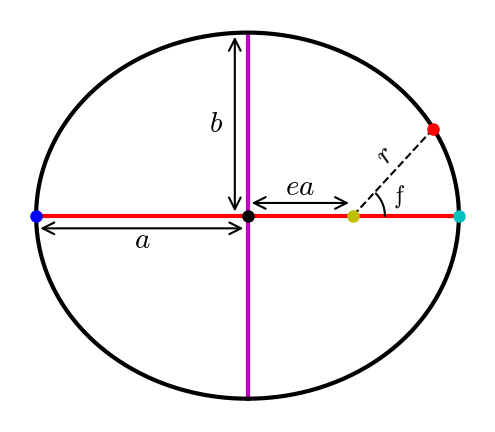

In [70]:
#Code to create Fig 2.1
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import rcParams
from myst_nb import glue

rcParams.update({'font.size': 14})
rcParams.update({'mathtext.fontset': 'cm'})

def grav(x,t):
    #derivative function for the two body problem in astrocentric coordinates
    #state function x = {x,y,z,vx,vy,vz}
    xp = np.zeros(6)
    xp[:3] = x[3:] #{vx,vy,vz}
    r = np.sqrt(np.sum(np.square(x[:3]))) #calculate the separation vector r
    xp[3:] = -G*M_star*x[:3]/r**3
    return xp

def Orb2Cart(a,e,omg,f):
    #Calculate the Cartesian state given orbital elements (a,e,omega,f)
    temp = np.zeros(6)
    r = a*(1-e**2)/(1+e*np.cos(f))
    n = np.sqrt(G*M_star/a**3) #mean motion n
    rdot = n*a*e*np.sin(f)/np.sqrt(1.-e**2)
    rfdot = n*a*(1+e*np.cos(f))/np.sqrt(1.-e**2)
    omg_f = omg + f 

    temp[:3] = [r*np.cos(omg_f), r*np.sin(omg_f), 0.]
    temp[3:] = [rdot*np.cos(omg_f) - rfdot*np.sin(omg_f),rdot*np.sin(omg_f) + rfdot*np.cos(omg_f),0]
    return temp
    

G = 4*np.pi**2 #Constant for Universal Gravitation (units: AU, yr, M_sun)
M_star = 1 #Solar mass
a,e,omg,f = 1,0.5,0,0
x_o = Orb2Cart(a,e,omg,f)
r_p, r_a = 0.5, -1.5
b = a*np.sqrt(1-e**2)
t_rng = np.arange(0,1.,1./365.25)
sol = odeint(grav, x_o, t_rng)

fs = 'medium'
lw = 2

fig = plt.figure(figsize=(4,4),dpi=150)
ax = fig.add_subplot(111)


ax.plot([r_a,-0.5],[0,0],'r-',lw=lw)
ax.plot([-0.5,r_p],[0,0],'r-',lw=lw)
ax.plot([-0.5,-0.5],[0,b],'m-',lw=lw)
ax.plot([-0.5,-0.5],[0,-b],'m-',lw=lw)

ax.text(-0.65,0.4,'$b$',horizontalalignment='center')
ax.annotate('', xy=(-0.56, 0), xytext=(-0.56, b), arrowprops=dict(arrowstyle='<->', color='k'))

ax.text(-1,-0.15,'$a$',horizontalalignment='center')
ax.annotate('', xy=(r_a, -0.06), xytext=(-0.5, -0.06), arrowprops=dict(arrowstyle='<->', color='k'))

ax.text(-0.25,0.1,'$ea$',horizontalalignment='center')
ax.annotate('', xy=(-0.5, 0.06), xytext=(0, 0.06), arrowprops=dict(arrowstyle='<->', color='k'))

ax.plot(-0.5,0,'k.',ms=10)
ax.plot(sol[:,0],sol[:,1],'k-',lw=lw)
ax.plot(r_p,0,'c.',ms=10)
ax.plot(r_a,0,'b.',ms=10)

ax.plot([0,sol[15,0]],[0,sol[15,1]],'k--',lw=1)
ax.plot(sol[15,0],sol[15,1],'r.',ms=10)
ax.plot(0,0,'y.',ms=10)
ax.text(0.15,0.25,'$r$',horizontalalignment='center',rotation=50)
ax.text(0.22,0.06,'$f$',horizontalalignment='center',rotation=10,fontsize='small')

arc_r = 0.15
ang_rng = np.radians(np.arange(0,45,1))
arc_x, arc_y = arc_r*np.cos(ang_rng), arc_r*np.sin(ang_rng)
ax.plot(arc_x,arc_y,'k-',lw=1)

#ax.set_xticks(np.arange(-1.5,1.5,0.5))
#ax.set_yticks(np.arange(-1,1.1,0.5))
ax.set_aspect('equal')
ax.axis('off')

glue("orbit_fig", fig, display=False);

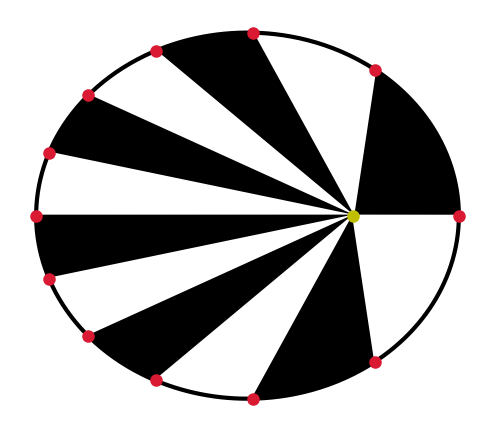

In [217]:
#Code to create Fig 2.2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy.integrate import odeint
from matplotlib import rcParams
from myst_nb import glue

rcParams.update({'font.size': 14})
rcParams.update({'mathtext.fontset': 'cm'})

def grav(x,t):
    #derivative function for the two body problem in astrocentric coordinates
    #state function x = {x,y,z,vx,vy,vz}
    xp = np.zeros(6)
    xp[:3] = x[3:] #{vx,vy,vz}
    r = np.sqrt(np.sum(np.square(x[:3]))) #calculate the separation vector r
    xp[3:] = -G*M_star*x[:3]/r**3
    return xp

def Orb2Cart(a,e,omg,f):
    #Calculate the Cartesian state given orbital elements (a,e,omega,f)
    temp = np.zeros(6)
    r = a*(1-e**2)/(1+e*np.cos(f))
    n = np.sqrt(G*M_star/a**3) #mean motion n
    rdot = n*a*e*np.sin(f)/np.sqrt(1.-e**2)
    rfdot = n*a*(1+e*np.cos(f))/np.sqrt(1.-e**2)
    omg_f = omg + f 

    temp[:3] = [r*np.cos(omg_f), r*np.sin(omg_f), 0.]
    temp[3:] = [rdot*np.cos(omg_f) - rfdot*np.sin(omg_f),rdot*np.sin(omg_f) + rfdot*np.cos(omg_f),0]
    return temp

def get_ellipse(x1,x2,a,b,cnt):
    xy = np.zeros((12,2))
    xy[1:,0] = np.linspace(x1,x2,11)
    p = 1-((xy[1:,0]+0.5)/a)**2
    y = b*np.sqrt(p)
    if cnt > 5:
        y *= -1
    xy[1:,1] = y
    return xy

G = 4*np.pi**2 #Constant for Universal Gravitation (units: AU, yr, M_sun)
M_star = 1 #Solar mass
a,e,omg,f = 1,0.5,0,0
x_o = Orb2Cart(a,e,omg,f)
r_p, r_a = 0.5, -1.5
b = a*np.sqrt(1-e**2)
t_step = 1./360.
t_rng = np.arange(0,1.+t_step,t_step)
sol = odeint(grav, x_o, t_rng)

fs = 'medium'
lw = 2
col = (218/256., 26/256., 50/256.)

fig = plt.figure(figsize=(4,4),dpi=150)
ax = fig.add_subplot(111)

ax.plot(0,0,'y.',ms=10)
ax.plot(sol[:,0],sol[:,1],'k-',lw=lw)
cnt = 0
n = 30
i_rng = int(len(sol)/n)
for i in range(0,i_rng):
    if cnt % 2 == 0:
        color = 'k'
    else:
        color = 'white'
    i_1,i_2 = n*i,n*(i+1)
    if i_2 > len(sol):
        i_2 = 0
    x_1,x_2 = sol[i_1,0],sol[i_2,0]
    y_1,y_2 = sol[i_1,1],sol[i_2,1]
    verts = get_ellipse(x_2,x_1,a,b,cnt)

    p1 = Polygon(verts,color=color)
    ax.add_artist(p1)
    ax.plot(x_1,y_1,'.',color=col,ms=10)

    cnt += 1

ax.set_aspect('equal')
ax.axis('off')

glue("area_fig", fig, display=False);

### Newton's Laws of Motion and Gravity
Isaac Newton developed the first *physical* model that explained the motion of objects using a single unified theory.  Newton's theory includes three laws of motion and one law of universal gravitation.

- **Newton's first law**: *A body remains at rest or in uniform motion unless a force is exerted upon it.*  It is also called the law of inertia and is a restatement of Galileo Galilei's work from the first half of 17th century.
- **Newton's second law**: *When a body is acted upon by a force, the time rate of change of its momentum equals the force.*  Consider a body of mass $m_1$ that is located using a position vector $\vec{r}_1$.  The body has an instantaneous velocity $\vec{v}_1 \equiv d\vec{r}_1/dt$, where its momentum $\vec{p}_1$ represents the product of the mass and velocity (i.e., $\vec{p}_1 = m_1\vec{v}_1$).  The acceleration produced by a net force $\vec{F}_1$ is <br> <br>
    
    ```{math}
    :label: Newtons_2nd
    \vec{F}_1 = \frac{d(m_1\vec{v}_1)}{dt} = m_1 \frac{d\vec{v}_1}{dt}.
    ```

- **Newton's third law**: **If a body $1$ that exerts a force on another body $2$, there is a force of equal magnitude and opposite direction exerted by body $2$ onto body $1$.  Mathematically, this is given as <br> <br>

    ```{math}
    :label: Newtons_3rd
    \vec{F}_{12} = -\vec{F}_{21},
    ```

    where the subscript $12$ denotes the force exerted by body $1$ on body $2$ and vice versa for $21$.
    
- **Newton's universal law of gravity**: *Every body in the universe exerts an attractive force on every other body that is directly proportional to the product of their masses and the inverse square of the distance between them.*  Consider two masses $m_1$ and $m_2$, the gravitational force between the bodies is given as <br> <br>

    ```{math}
    :label: Newtons_gravity
    \vec{F}_{12} = -\frac{Gm_1m_2}{r^3}\vec{r}_{12} = -\frac{Gm_1m_2}{r^2}\hat{r}_{12}.
    ```

    The gravitational force depends on the relative separation of the bodies through the vector difference $\vec{r}_{12} = \vec{r}_1 - \vec{r}_2$, where the unit vector <br> <br> 
    
    $$ \hat{r}_{12} \equiv \frac{\vec{r}_{12}}{|\vec{r}_{12}|}. $$

    It additionally depends on the universal gravitational constant $G$.

Kepler deduced his laws of planetary motion from careful observation, but they were subsequently shown to be derivable from Newton's laws of motion together with the universal law of gravity.  

### Bound and Unbound Orbits

For a pair of bodies to travel on a circular orbit about their mutual center of mass $M_{com}$, they must be pulled towards one another enough to balance inertia.  Gravity must balance the centrifugal *pseudoforce* that arises if the problem is viewed as a steady state in a reference frame that is rotating with the angular velocity $n$ of the two bodies.  This angular velocity is also called the *mean motion* and is represented as

$$ n \equiv \frac{2\pi}{P} = \sqrt{\frac{GM_{com}}{a^3}}. $$

The **centripetal force** necessary to keep an object of mass $m$ in a circular orbit of radius $r$ with a speed $v_c$ is

```{math}
:label: centripetal
\vec{F}_c = mn^2\vec{r} = \frac{mv_c^2}{r}\hat{r}.
```

The speed $v_c$ of a circular orbit can be found by equating the centripetal force to the gravitational force exerted by the central body with a mass $M$.  This results in

```{math}
:label: circular_vel
v_c = \sqrt{\frac{GM}{r}}.
```

The total energy $E$ of the system is a conserved quantity, which means that it is equal to the sum of the kinetic energy $(K = mv^2/2)$ and the potential energy $U = -GMm/r$.  For circular orbits $r=a$, which gives

```{math}
:label: grav_tot_energy
E &= \frac{1}{2}mv^2 - \frac{GMm}{r}, \\
&= \frac{GMm}{2a} - \frac{GMm}{a} = -\frac{GMm}{2a}.
```

If $E<0$, then the magnitude of the potential energy is larger than the kinetic energy of the mass.  The system is **bound** because the mass $m$ lacks a sufficient amount of kinetic energy to escape.  The mass $m$ orbits the central mass $M$ on an elliptical path.

```{note}
The equation for the total energy is degenerate regarding elliptical or circular orbits.  Notice that our expression in Eqn. {eq}`grav_tot_energy` does not depend on eccentricity at all.
```

The velocity along an elliptical orbit $v_{ell}$ can be derived from Eqn. {eq}`grav_tot_energy` to get

```{math}
:label: elliptical_vel
v_{ell} = \sqrt{GM\left(\frac{2}{r}-\frac{1}{a}\right)},
```

which is known as the [vis viva equation](https://en.wikipedia.org/wiki/Vis-viva_equation).

If $E>0$, the mass $m$ can escape because its kinetic energy is now larger than the magnitude of the potential energy.  The system is **unbound**, and the orbit is described mathematically as a hyperbola.  If the kinetic energy exactly equals the magnitude of the potential energy (i.e., $K = |U|$), then $E=0$ and the the orbit is a parabola.

Using the condition for a parabolic orbit $E=0$, we can determine the **escape velocity** at any separation, or

```{math}
:label: escape_speed
v_{esc} = \sqrt{\frac{2GM}{r}} = \sqrt{2}v_c.
```

The orbit in the two body problem is an ellipse, parabola, or hyperbola, which depends on whether the total energy is negative, zero, or positive, respectively.  Geometrically, these curves are known as [conic sections](https://en.wikipedia.org/wiki/Conic_section) and are illustrated in Fig. {numref}`{number}<conic-sections>`.

```{figure-md} conic-sections
<img src="https://upload.wikimedia.org/wikipedia/commons/1/11/Conic_Sections.svg" alt="conic sections"  width="400px">

The black boundaries of the colored regions are conic sections. Image credit: Wikipedia:[conic sections](https://en.wikipedia.org/wiki/Conic_section) by user:Magister_Mathematicae.
```

Equation {eq}`distance` can be generalized to include unbound orbits to get

```{math}
:label: general_distance
r = \frac{\zeta}{1+e\cos f},
```

which depends on the **generalized eccentricity** $e$ and a constant $\zeta$.  The true anomaly $f$ and distance $r$ carry the same meaning as in Eqn. {eq}`distance`.  The constant $\zeta$ is defined as:

```{math}
:label: general_ecc
\zeta = 
\begin{cases}
    a\left(1-e^2\right), \qquad & (e<1) \\[5pt]
    2q, \qquad & (e = 1) \\[5pt]
    q(1+e). \qquad & (e>1) 
\end{cases}
```

The **pericentric separation** $q$ is the distance of closest approach.  For all orbits the three orientation angles $i$, $\omega$, and $\Omega$ carry the same definitions as in the elliptical case.

The energy of an orbit is uniquely specified by its semimajor axis $a$, but the magnitude of the angular momentum $|\vec{L}|$ depends on both the semimajor axis and eccentricity, by

```{math}
:label: ang_momentum
|\vec{L}| = m\sqrt{GMa(1-e^2)}.
```

For a given semimajor axis, a circular orbit contains the maximum amount of angular momentum.  This occurs because when $r=a$ for an eccentric orbit, the magnitude of the velocity is the same as an equivalent circular orbit (via conservation of energy), but not all of the velocity is directed perpendicular to the line connecting the two bodies.

## Thermodynamics

### Laws of Thermodynamics

### Barometric Law and Hydrostatic Equilibrium

## Stellar Properties and Lifetimes

### Virial Theorem

### Luminosity

### Stellar Size

## Sizes and Densities of Massive Planets

## Nucleosynthesis

### Primordial Nucleosynthesis

### Stellar Nucleosynthesis

### Radioactive decay
